In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
%matplotlib inline
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [167]:
data=pd.read_csv('C:/Users/SONY/Desktop/expenses.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [168]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1336.000000,1338.000000,1338.000000
mean,39.310912,30.668413,1.094918,13270.422265
std,14.185613,6.099896,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.308750,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.700000,2.000000,16639.912515
max,95.000000,53.130000,5.000000,63770.428010


In [169]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1336 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [170]:
col=data.columns
col

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [171]:
data.isnull().sum()

age         0
sex         0
bmi         2
children    0
smoker      0
region      0
charges     0
dtype: int64

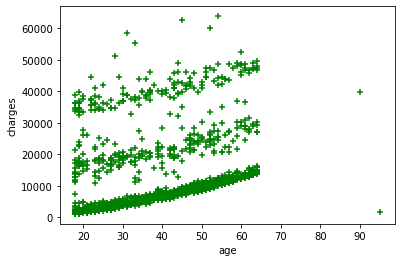

In [173]:
plt.xlabel('age')
plt.ylabel('charges')
plt.scatter(data.age,data.charges,color='g',marker='+')

<AxesSubplot:>

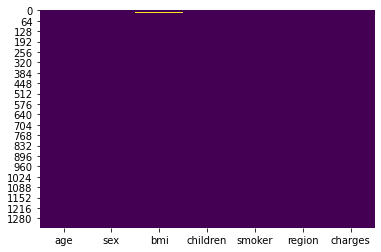

In [174]:
sns.heatmap(data.isnull(), cmap = 'viridis', cbar=False)

In [175]:
data.isnull().sum()

age         0
sex         0
bmi         2
children    0
smoker      0
region      0
charges     0
dtype: int64

In [176]:
d=data['bmi'].median()

In [177]:
data['bmi'].replace(np.nan,d,inplace=True)

In [178]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [179]:
duplicatedvalues=data.duplicated()
print(duplicatedvalues.sum())
data[duplicatedvalues]

1


,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [180]:
data.drop_duplicates(inplace=True)

In [181]:
duplicatedvalues=data.duplicated()
duplicatedvalues.sum()

0

<function matplotlib.pyplot.show(close=None, block=None)>

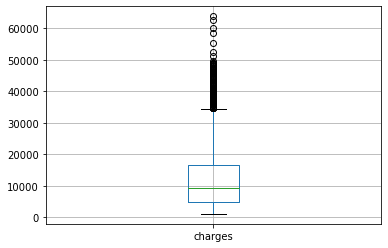

In [182]:
data.boxplot(column=['charges'])
plt.show

In [183]:
def outliers(col):
    sorted(col)
    quant1,quant2=col.quantile([0.25,0.75])
    IQR=quant2-quant1
    lowerRange=quant1-(1.5*IQR)
    upperRange=quant2+(1.5*IQR)
    return lowerRange,upperRange

In [184]:
lowscore,highscore=outliers(data['charges'])
data['charges']=np.where(data['charges']>highscore,highscore,data['charges'])

<function matplotlib.pyplot.show(close=None, block=None)>

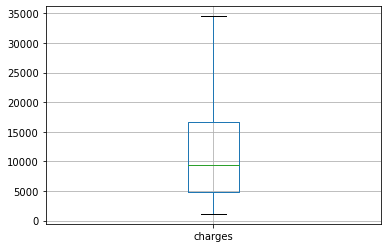

In [185]:
data.boxplot(column=['charges'])
plt.show

In [186]:
data.corr()

,age,bmi,children,charges
age,1.000000,0.109644,0.037798,0.312437
bmi,0.109644,1.000000,0.012033,0.159683
children,0.037798,0.012033,1.000000,0.072372
charges,0.312437,0.159683,0.072372,1.000000


<AxesSubplot:>

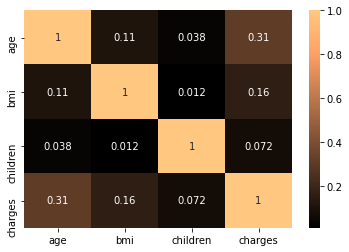

In [187]:
sns.heatmap(data.corr(),annot=True,cmap='copper')

<AxesSubplot:xlabel='age', ylabel='charges'>

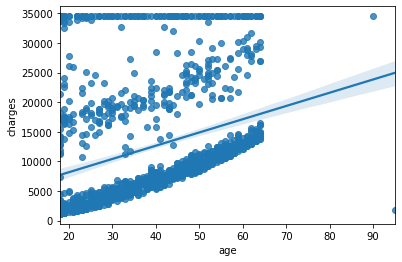

In [188]:
sns.regplot(x='age',y='charges',data=data)

In [189]:
X=data.drop(['charges'],axis=1)
y=data['charges']

In [200]:
dummies=pd.get_dummies(X)
X=dummies

In [201]:
X.shape

(1337, 11)

In [202]:
y.shape

(1337,)

In [203]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [204]:
X_train.shape

(1069, 11)

In [205]:
X_test.shape

(268, 11)

In [206]:
y_train.shape

(1069,)

In [207]:
y_test.shape

(268,)

In [208]:
reg=linear_model.LinearRegression()
reg.fit(X_train,y_train)
reg.score(X_test,y_test)

0.7298431716898008

In [209]:
from sklearn.model_selection import cross_val_score

In [210]:
cross_val_score(LinearRegression(),X,y)

array([0.74935523, 0.68082115, 0.78825537, 0.72877612, 0.76300319])